In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# read the city and rider data files and store them as DataFrames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

## Explore the Data in Pandas

#### Inspect the City DataFrame

In [4]:
# get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:
# get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# get the number of data points from Urban cities
sum(city_data_df['type']=='Urban')

66

#### Inspect the Ride Data DataFrame

In [7]:
# get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
# get the datatypes of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# review the columns for each DataFrame
city_data_df.columns, ride_data_df.columns

(Index(['city', 'driver_count', 'type'], dtype='object'),
 Index(['city', 'date', 'fare', 'ride_id'], dtype='object'))

In [10]:
# combine both DataFrames
pyber_data_df = pd.merge(
    ride_data_df, 
    city_data_df, 
    how='left', 
    on=['city', 'city']
)

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Create DataFrames for Each Type of City

In [11]:
# create urban, suburban, and rural DataFrames
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

## Get the Number of Rides for Each City Type

In [12]:
# get the number of rides for urban, suburban, and rural cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

## Get the Average Fare for Each City Type

In [13]:
# get the average fare for each city in urban, suburban, and rural cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

## Get the Average Number of Drivers for Each City Type

In [14]:
# get the average number of drivers for each urban, suburban, and rural city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

## Create Bubble Charts

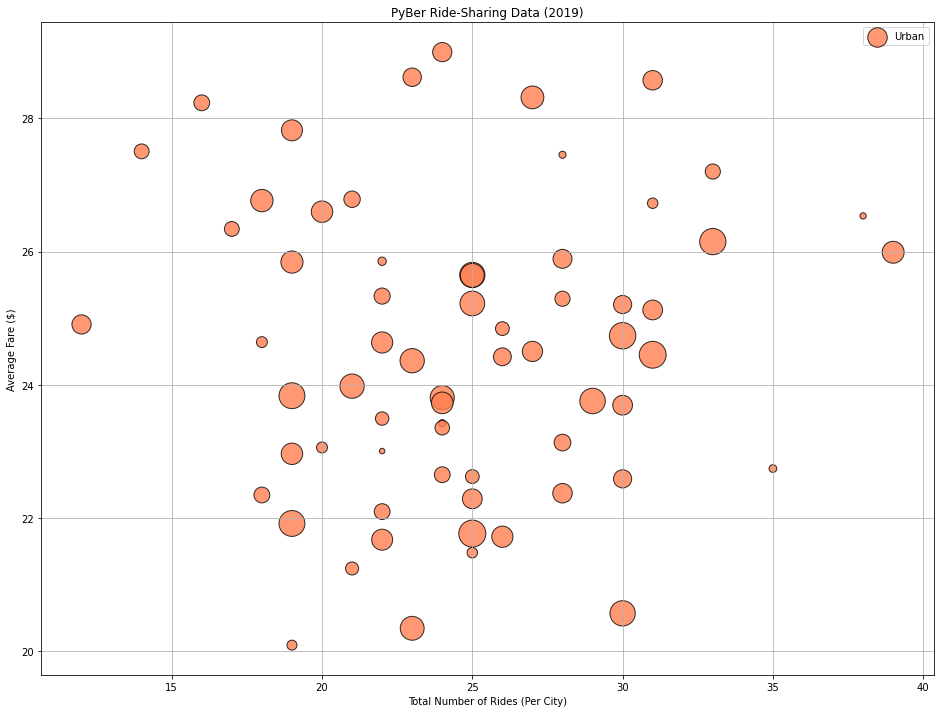

In [15]:
# build the scatter plots for urban cities
plt.figure(figsize=(16,12)) 
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count,
    c='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban'
)
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

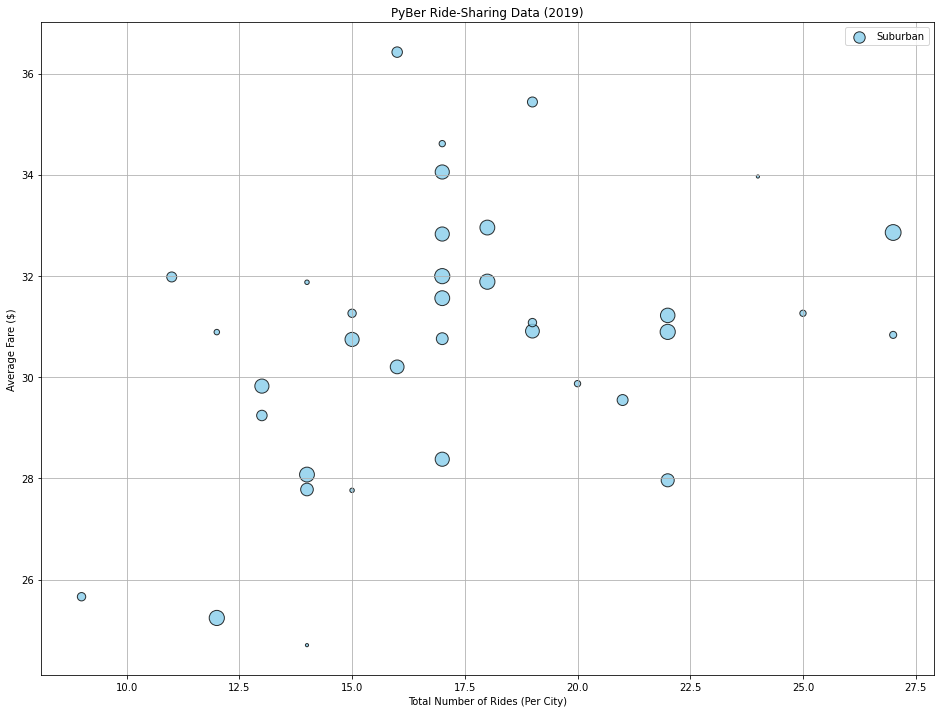

In [20]:
# build the scatter plots for urban cities
plt.figure(figsize=(16,12)) 
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count,
    c='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban'
)
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

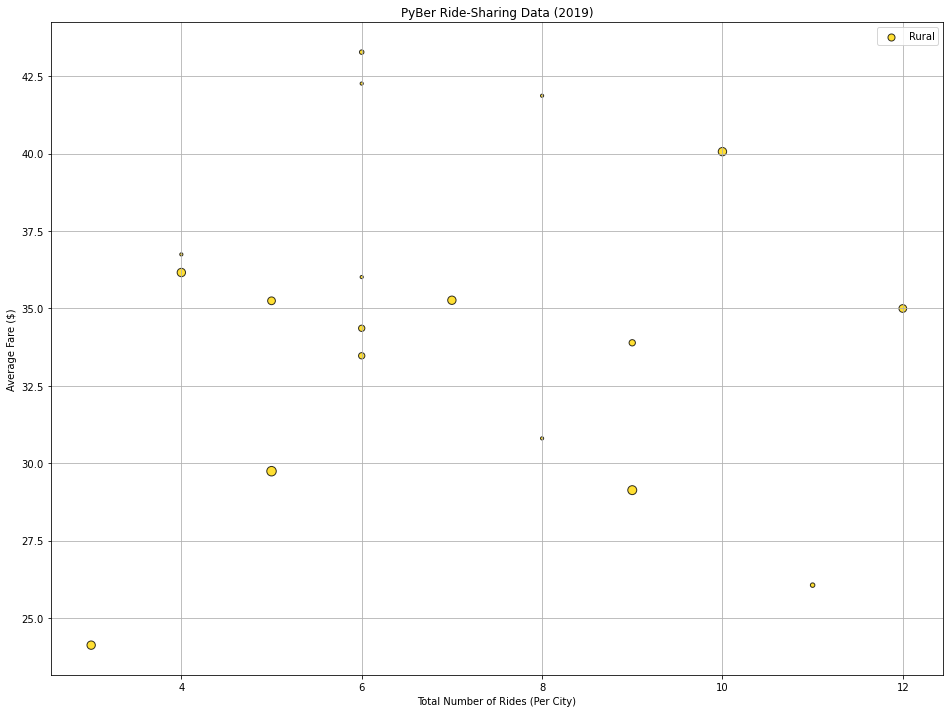

In [22]:
# build the scatter plots for urban cities
plt.figure(figsize=(16,12)) 
plt.scatter(
    rural_ride_count, 
    rural_avg_fare,
    s=10*rural_driver_count,
    c='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural'
)
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

#### Create a Bubble Chart for All Cities

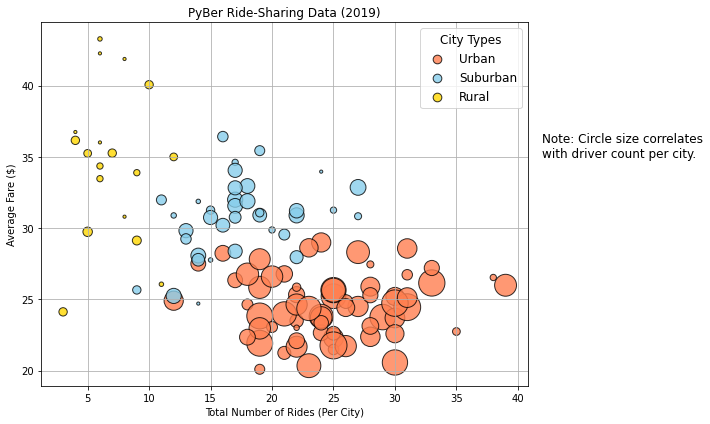

In [45]:
plt.subplots(figsize=(10,6)) 
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count,
    c='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban'
)

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count,
    c='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban'
)

plt.scatter(
    rural_ride_count, 
    rural_avg_fare,
    s=10*rural_driver_count,
    c='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural'
)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

# create a legend
lgnd = plt.legend(
    fontsize='12',
    mode='Expanded',
    scatterpoints=1,
    loc='best',
    title='City Types'
)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# incorporate a text label about circle size
plt.text(42, 35, 'Note: Circle size correlates\nwith driver count per city.', fontsize='12')

# ensure text isn't cut off
plt.tight_layout()

# save the figure
plt.savefig('analysis/Fig1.png')

plt.show()